In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
pd.set_option('display.max_columns', None)


In [239]:
# Load train data
train_inpt = pd.read_csv('Train_Inpatientdata.csv', index_col = 0)
train_outpt = pd.read_csv('Train_Outpatientdata.csv', index_col = 0)
train_beneficiary = pd.read_csv('Train_Beneficiarydata.csv', index_col = 0)
train = pd.read_csv('Train_FraudFlag.csv', index_col = 0)

# Load test data
test_inpt = pd.read_csv('Test_Inpatientdata.csv', index_col = 0)
test_outpt = pd.read_csv('Test_Outpatientdata.csv', index_col = 0)
test_beneficiary = pd.read_csv('Test_Beneficiarydata.csv', index_col = 0)
test = pd.read_csv('Test.csv', index_col = 0)


In [240]:
# Shape of train data
print(train_inpt.shape, train_outpt.shape, train_beneficiary.shape, train.shape)

(40474, 29) (517737, 26) (138556, 24) (5410, 1)


In [241]:
# Shape of test data
print(test_inpt.shape, test_outpt.shape, test_beneficiary.shape, test.shape)

(9551, 29) (125841, 26) (63968, 24) (1353, 0)


In [242]:
print(len(train_inpt.ClaimID.unique()))
print(len(train_outpt.ClaimID.unique()))
print(len(test_inpt.ClaimID.unique()))
print(len(test_outpt.ClaimID.unique()))

40474
517737
9551
125841


In [243]:
len(train_outpt.ClmAdmitDiagnosisCode.unique())
len(train_inpt.ClmAdmitDiagnosisCode.unique())

1928

In [244]:
sum(pd.notnull(train_outpt.ClmAdmitDiagnosisCode))/len(train_outpt)*100

20.36265517048231

#### Beneficiary data

In [245]:
train_beneficiary.head()

,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
BeneID,,,,,,,,,,,,,,,,,,,,,,,,
BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [246]:
train_beneficiary.reset_index(inplace=True)

In [247]:
train_beneficiary.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [248]:
train_beneficiary.RenalDiseaseIndicator.unique()

array(['0', 'Y'], dtype=object)

In [249]:
# change RenalDiseaseIndicator from '0' and 'Y' to 0 and 1 for no and yes
train_beneficiary.RenalDiseaseIndicator.replace(['0', 'Y'], [0, 1], inplace=True)

test_beneficiary.RenalDiseaseIndicator.replace(['0', 'Y'], [0, 1], inplace=True)

In [250]:
# convert DOB and DOD to datetime type
train_beneficiary.DOB = pd.to_datetime(train_beneficiary.DOB , format = '%Y-%m-%d')
train_beneficiary.DOD = pd.to_datetime(train_beneficiary.DOD , format = '%Y-%m-%d')

test_beneficiary.DOB = pd.to_datetime(test_beneficiary.DOB , format = '%Y-%m-%d')
test_beneficiary.DOD = pd.to_datetime(test_beneficiary.DOD , format = '%Y-%m-%d')

In [251]:
# Create an Age feature
train_beneficiary['Age'] = round((train_beneficiary.DOD - train_beneficiary.DOB).dt.days/365)
train_beneficiary.head(10)

test_beneficiary['Age'] = round((test_beneficiary.DOD - test_beneficiary.DOB).dt.days/365)


In [252]:
train_beneficiary.DOD.unique()

array([                          'NaT', '2009-12-01T00:00:00.000000000',
       '2009-09-01T00:00:00.000000000', '2009-05-01T00:00:00.000000000',
       '2009-07-01T00:00:00.000000000', '2009-08-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-06-01T00:00:00.000000000',
       '2009-04-01T00:00:00.000000000', '2009-02-01T00:00:00.000000000',
       '2009-11-01T00:00:00.000000000', '2009-03-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [253]:
# Assuming the current date of the data is 2009-12-01 (the last recorded death)
last_date = pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') 
train_beneficiary.Age.fillna(round((last_date - train_beneficiary.DOB).dt.days/365), inplace=True)
train_beneficiary.head()

test_beneficiary.Age.fillna(round((last_date - test_beneficiary.DOB).dt.days/365), inplace=True)


In [254]:
# Add row Deceased to indicate if person is dead
train_beneficiary['Deceased'].astype(object)
train_beneficiary.loc[train_beneficiary.DOD.isnull(), 'Deceased']=0
train_beneficiary.loc[train_beneficiary.DOD.notnull(), 'Deceased']=1

test_beneficiary.loc[test_beneficiary.DOD.isnull(), 'Deceased']=0
test_beneficiary.loc[test_beneficiary.DOD.notnull(), 'Deceased']=1

KeyError: 'Deceased'

In [ ]:
Chron_Conditions = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']

# def change_DataType(columns, df, datatype):
#     for col in columns:
#         return df[col].astype(datatype)
for col in Chron_Conditions:
    train_beneficiary[col] = train_beneficiary[col].astype(object)
    train_beneficiary[col].replace({2:0}, inplace=True)


In [ ]:
misc_col =['Gender', 'Race', 'State', 'County']
for col in misc_col:
    train_beneficiary[col] = train_beneficiary[col].astype(object)


In [ ]:
train_beneficiary.dtypes

In [ ]:
# ChronicCond = ['RenalDiseaseIndicator',
#        'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
#        'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
#        'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
#        'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
#        'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
#        'ChronicCond_stroke', 'Deceased']

# for col in ChronicCond:
#     train_beneficiary[col] = train_beneficiary[col].astype(object)
train_beneficiary.head()

In [ ]:
train_beneficiary.isnull().sum()

#### Inpatient Data

In [255]:
train_inpt.head()

,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
BeneID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [256]:
train_inpt.DeductibleAmtPaid.unique()
train_inpt.DeductibleAmtPaid.value_counts()

1068.0    39575
Name: DeductibleAmtPaid, dtype: int64

In [257]:
train_inpt.dtypes

ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
dtype: object

In [258]:
train_inpt.reset_index(inplace=True)

In [259]:
# Convert dates data to datetime data type
train_inpt.ClaimStartDt = pd.to_datetime(train_inpt.ClaimStartDt , format = '%Y-%m-%d')
train_inpt.ClaimEndDt = pd.to_datetime(train_inpt.ClaimEndDt , format = '%Y-%m-%d')
train_inpt.AdmissionDt = pd.to_datetime(train_inpt.AdmissionDt , format = '%Y-%m-%d')
train_inpt.DischargeDt = pd.to_datetime(train_inpt.DischargeDt , format = '%Y-%m-%d')

test_inpt.ClaimStartDt = pd.to_datetime(test_inpt.ClaimStartDt , format = '%Y-%m-%d')
test_inpt.ClaimEndDt = pd.to_datetime(test_inpt.ClaimEndDt , format = '%Y-%m-%d')
test_inpt.AdmissionDt = pd.to_datetime(test_inpt.AdmissionDt , format = '%Y-%m-%d')
test_inpt.DischargeDt = pd.to_datetime(test_inpt.DischargeDt , format = '%Y-%m-%d')


In [260]:
train_inpt.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [261]:
# Fill missing doctors with 'None' instead of leaving them NA
train_inpt.AttendingPhysician.fillna('None', inplace=True)
train_inpt.OperatingPhysician.fillna('None', inplace=True)
train_inpt.OtherPhysician.fillna('None', inplace=True)

test_inpt.AttendingPhysician.fillna('None', inplace=True)
test_inpt.OperatingPhysician.fillna('None', inplace=True)
test_inpt.OtherPhysician.fillna('None', inplace=True)

In [262]:
train_inpt.DeductibleAmtPaid.fillna(0, inplace=True)

test_inpt.DeductibleAmtPaid.fillna(0, inplace=True)

In [263]:
# Create new feature for length of stay
train_inpt['LengthStay'] = train_inpt.DischargeDt - train_inpt.AdmissionDt

test_inpt['LengthStay'] = test_inpt.DischargeDt - test_inpt.AdmissionDt
train_inpt.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,LengthStay
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 days
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2 days
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 days
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8 days
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17 days


In [264]:
# Create new feature to indicate the encounter is outpatient vs inpatient
# Outpatient = 0 and inpatient = 1
train_inpt['Encounter'] = 1
train_inpt.Encounter

test_inpt['Encounter'] = 1


In [265]:
ClaimProcedure_col = ['ClmProcedureCode_1','ClmProcedureCode_2', 'ClmProcedureCode_3',
                      'ClmProcedureCode_4','ClmProcedureCode_5', 'ClmProcedureCode_6']

for col in ClaimProcedure_col:
    train_inpt[col] = train_inpt[col].astype(object)

In [266]:
train_inpt.isnull().sum()


BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician            0
OperatingPhysician            0
OtherPhysician                0
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid             0
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
LengthStay                    0
Encounte

#### Outpatient Data

In [267]:
train_outpt.head()

,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
BeneID,,,,,,,,,,,,,,,,,,,,,,,,,,
BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [268]:
train_outpt.DeductibleAmtPaid.value_counts()

0      496701
100      4582
70       2420
60       2065
40       2045
80       2024
50       1969
20       1406
30       1336
90       1245
10       1203
200       734
897         2
876         2
865         2
886         1
Name: DeductibleAmtPaid, dtype: int64

In [269]:
train_outpt.dtypes

ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

In [270]:
train_outpt.reset_index(inplace=True)

In [271]:
for col in ClaimProcedure_col:
    train_outpt[col] = train_outpt[col].astype(object)

In [272]:
# Convert dates data to datetime data type
train_outpt.ClaimStartDt = pd.to_datetime(train_outpt.ClaimStartDt , format = '%Y-%m-%d')
train_outpt.ClaimEndDt = pd.to_datetime(train_outpt.ClaimEndDt , format = '%Y-%m-%d')

test_outpt.ClaimStartDt = pd.to_datetime(test_outpt.ClaimStartDt , format = '%Y-%m-%d')
test_outpt.ClaimEndDt = pd.to_datetime(test_outpt.ClaimEndDt , format = '%Y-%m-%d')

In [273]:
train_outpt.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [274]:
# Fill missing doctors with 'None' instead of leaving them NA
train_outpt.AttendingPhysician.fillna('None', inplace=True)
train_outpt.OperatingPhysician.fillna('None', inplace=True)
train_outpt.OtherPhysician.fillna('None', inplace=True)

test_outpt.AttendingPhysician.fillna('None', inplace=True)
test_outpt.OperatingPhysician.fillna('None', inplace=True)
test_outpt.OtherPhysician.fillna('None', inplace=True)

In [275]:
# Create new feature to indicate the encounter is outpatient vs inpatient
# Outpatient = 0 and inpatient = 1
train_outpt['Encounter'] = 0

test_outpt['Encounter'] = 0

#### Train Fraudulent Indicator Data

In [276]:
train.head()

,PotentialFraud
Provider,
PRV51001,No
PRV51003,Yes
PRV51004,No
PRV51005,Yes
PRV51007,No


In [277]:
train.isnull().sum()

PotentialFraud    0
dtype: int64

In [295]:
train.shape

(5410, 1)

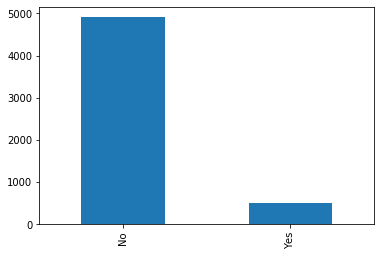

In [278]:
pd.DataFrame(train.PotentialFraud.value_counts())
train.PotentialFraud.value_counts().plot(x='PotentialFraud', kind='bar')

In [279]:
potentialFraudCounts = train.groupby('PotentialFraud').agg({'PotentialFraud': 'count'}).apply(lambda x: 100 * x / float(x.sum()))
potentialFraudCounts.rename({'PotentialFraud':'Percentage'})
potentialFraudCounts

,PotentialFraud
PotentialFraud,
No,90.64695
Yes,9.35305


In [280]:
# Convert PotentialFraud str values to numerical values
# train.head()
train.PotentialFraud.replace(['No', 'Yes'], [0, 1], inplace = True)
train['PotentialFraud'].astype(object)
train.head()


,PotentialFraud
Provider,
PRV51001,0
PRV51003,1
PRV51004,0
PRV51005,1
PRV51007,0


#### Combining Inpatient, Outpatient, Beneficiary, and Training Fraud Data to One Data Frame

In [289]:
# Faster and same results as above since no two rows are the same
temp_df = train_inpt.append(train_outpt)
print(temp_df.shape)
temp_df.head()

(558211, 32)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,LengthStay,Encounter
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 days,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092,NaN,NaN,NaN,NaN,NaN,2 days,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 days,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331,NaN,NaN,NaN,NaN,NaN,8 days,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893,NaN,NaN,NaN,NaN,NaN,17 days,1


In [290]:
train_beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age'],
      dtype='object')

In [291]:
# Combine inpatient and outpatient data with beneficiary info
combined_beneficiaries = pd.merge(temp_df, train_beneficiary, on = 'BeneID', how='outer')
print(combined_beneficiaries.shape)
combined_beneficiaries.head()

(558211, 57)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,LengthStay,Encounter,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 days,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,67.0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092,NaN,NaN,NaN,NaN,NaN,2 days,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,67.0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 days,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,67.0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331,NaN,NaN,NaN,NaN,NaN,8 days,1,1914-03-01,NaT,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,96.0
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,None,None,NaT,78900,0.0,NaT,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0,1914-03-01,NaT,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,96.0


In [292]:
combined_beneficiaries_providers = pd.merge(combined_beneficiaries, train, on = 'Provider', how='outer')
print(combined_beneficiaries_providers.shape)
combined_beneficiaries_providers.head()


(558211, 58)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,LengthStay,Encounter,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 days,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,67.0,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,None,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,78.0,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769,5849,NaN,NaN,NaN,NaN,12 days,1,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,96.0,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338,NaN,NaN,NaN,NaN,NaN,18 days,1,1922-10-01,NaT,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,87.0,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154,NaN,NaN,NaN,NaN,NaN,4 days,1,1930-07-01,NaT,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,79.0,1


In [293]:
combined_beneficiaries_providers.to_csv('combined_df.csv', index=False)

In [285]:
ClmDiagnosisCodes = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 
                     'ClmDiagnosisCode_4','ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 
                     'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
                    'ClmDiagnosisCode_10', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode']

ClmProcedureCodes = ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 
                     'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']

for diagnosis in ClmDiagnosisCodes:
    combined_beneficiaries_providers[diagnosis].fillna('None', inplace=True)

for procedure in ClmProcedureCodes:
    combined_beneficiaries_providers[procedure].fillna('None', inplace=True)

combined_beneficiaries_providers.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,LengthStay,Encounter,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,None,None,None,None,None,None,None,6 days,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,67.0,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,None,NaT,None,0.0,NaT,None,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,None,None,None,None,None,None,None,NaT,0,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,78.0,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,None,7769,5849,None,None,None,None,12 days,1,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,96.0,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,None,9338,None,None,None,None,None,18 days,1,1922-10-01,NaT,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,87.0,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,None,None,None,8154,None,None,None,None,None,4 days,1,1930-07-01,NaT,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,79.0,1


In [286]:
combined_beneficiaries_providers['LengthStay'].fillna('0', inplace=True)


In [287]:
combined_beneficiaries_providers.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                      0
OperatingPhysician                      0
OtherPhysician                          0
AdmissionDt                        517737
ClmAdmitDiagnosisCode                   0
DeductibleAmtPaid                       0
DischargeDt                        517737
DiagnosisGroupCode                      0
ClmDiagnosisCode_1                      0
ClmDiagnosisCode_2                      0
ClmDiagnosisCode_3                      0
ClmDiagnosisCode_4                      0
ClmDiagnosisCode_5                      0
ClmDiagnosisCode_6                      0
ClmDiagnosisCode_7                      0
ClmDiagnosisCode_8                      0
ClmDiagnosisCode_9                      0
ClmDiagnosisCode_10               

In [294]:
# combined_beneficiaries_providers.to_csv('combined_df.csv', index=False)
combined_beneficiaries_providers.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,LengthStay,Encounter,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 days,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,67.0,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,None,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,78.0,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769,5849,NaN,NaN,NaN,NaN,12 days,1,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,96.0,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338,NaN,NaN,NaN,NaN,NaN,18 days,1,1922-10-01,NaT,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,87.0,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154,NaN,NaN,NaN,NaN,NaN,4 days,1,1930-07-01,NaT,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,79.0,1


#### Create columns for frequent DiagnosisGroupCode and ClmAdmitDiagnosisCode

In [85]:
len(combined_beneficiaries_providers['DiagnosisGroupCode'].unique())

737

In [102]:
print(len(train_inpt['DiagnosisGroupCode'].unique()))
# print(len(train_outpt.DiagnosisGroupCode.unique())) # Not exist

736


In [120]:
len(train_inpt)

40474

In [175]:
combined_beneficiaries_providers.DiagnosisGroupCode = combined_beneficiaries_providers.DiagnosisGroupCode.astype(object)
combined_beneficiaries_providers.dtypes

BeneID                                      object
ClaimID                                     object
ClaimStartDt                        datetime64[ns]
ClaimEndDt                          datetime64[ns]
Provider                                    object
InscClaimAmtReimbursed                       int64
AttendingPhysician                          object
OperatingPhysician                          object
OtherPhysician                              object
AdmissionDt                         datetime64[ns]
ClmAdmitDiagnosisCode                       object
DeductibleAmtPaid                          float64
DischargeDt                         datetime64[ns]
DiagnosisGroupCode                          object
ClmDiagnosisCode_1                          object
ClmDiagnosisCode_2                          object
ClmDiagnosisCode_3                          object
ClmDiagnosisCode_4                          object
ClmDiagnosisCode_5                          object
ClmDiagnosisCode_6             

In [211]:
DiagnosisGroupCode = pd.DataFrame()
temp_df = combined_beneficiaries_providers.loc[combined_beneficiaries_providers['Encounter'] == 1]
DiagnosisGroupCode['DiagnosisGroupCode_Count'] = temp_df['DiagnosisGroupCode'].value_counts()
DiagnosisGroupCode['DiagnosisGroupCode_Percentage'] = DiagnosisGroupCode['DiagnosisGroupCode_Count']/len(temp_df)*100
DiagnosisGroupCode.rename(columns = {'index': 'code'}, inplace=True)
DiagnosisGroupCode.loc[DiagnosisGroupCode['DiagnosisGroupCode_Percentage'] > 0.3]


,DiagnosisGroupCode_Count,DiagnosisGroupCode_Percentage
882,179,0.442259
884,174,0.429906
166,168,0.415081
183,165,0.407669
939,163,0.402728
...,...,...
195,123,0.303899
853,122,0.301428
249,122,0.301428
862,122,0.301428


In [227]:
top_DiagnosisGroupCode = DiagnosisGroupCode.loc[DiagnosisGroupCode['DiagnosisGroupCode_Percentage'] > 0.3]
top_DiagnosisGroupCode.index
codes = ['882', '884', '166', '183', '939', '883', '168', '887', '204', '945',
       '876', '949', '202', '167', '208', '198', '188', '177', '182', '196',
       '192', '885', '184', '940', '186', '180', '175', '181', '880', '941',
       '946', '881', '193', '886', '187', '205', '948', '197', '164', '947',
       '206', '203', '000', '191', '207', '185', '190', '950', '179', '200',
       '199', '176', '201', '189', '163', '165', '178', '242', '256', '303',
       '195', '853', '249', '862', '286']
diag_cols = [x for x in combined_beneficiaries_providers.columns if "DiagnosisGroupCode" in x]

for col in codes:
#     combined_beneficiaries_providers[str(col)+'_diag'] = np.where((combined_beneficiaries_providers[diag_cols].eq(col)).any(1, skipna=True), 1, 0)
    if any(combined_beneficiaries_providers['DiagnosisGroupCode'] in codes):
        print(yes)
#         combined_beneficiaries_providers[str(col)+'_diag'] = 1
#     else:
#         combined_beneficiaries_providers[str(col)+'_diag'] = 0
# type(top_DiagnosisGroupCode)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [224]:
combined_beneficiaries_providers

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,LengthStay,Encounter,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud,882_diag,884_diag,166_diag,183_diag,939_diag,883_diag,168_diag,887_diag,204_diag,945_diag,876_diag,949_diag,202_diag,167_diag,208_diag,198_diag,188_diag,177_diag,182_diag,196_diag,192_diag,885_diag,184_diag,940_diag,186_diag,180_diag,175_diag,181_diag,880_diag,941_diag,946_diag,881_diag,193_diag,886_diag,187_diag,205_diag,948_diag,197_diag,164_diag,947_diag,206_diag,203_diag,000_diag,191_diag,207_diag,185_diag,190_diag,950_diag,179_diag,200_diag,199_diag,176_diag,201_diag,189_diag,163_diag,165_diag,178_diag,242_diag,256_diag,303_diag,195_diag,853_diag,249_diag,862_diag,286_diag
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 days,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,None,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,78.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769,5849,NaN,NaN,NaN,NaN,12 days,1,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,96.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338,NaN,NaN,NaN,NaN,NaN,18 days,1,1922-10-01,NaT,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,87.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154,NaN,NaN,NaN,NaN,NaN,4 days,1,1930-07-01,NaT,2,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,79.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [129]:
print(len(combined_beneficiaries_providers['ClmAdmitDiagnosisCode'].unique()))
print(len(train_inpt['ClmAdmitDiagnosisCode'].unique()))
print(len(train_outpt['ClmAdmitDiagnosisCode'].unique()))


4099
1928
3716


In [140]:
ClmAdmitDiagnosisCode = pd.DataFrame()
ClmAdmitDiagnosisCode['ClmAdmitDiagnosisCode_Count'] = combined_beneficiaries_providers['ClmAdmitDiagnosisCode'].value_counts()
ClmAdmitDiagnosisCode['ClmAdmitDiagnosisCode_Percentage'] = ClmAdmitDiagnosisCode['ClmAdmitDiagnosisCode_Count']/len(combined_beneficiaries_providers)*100
len(ClmAdmitDiagnosisCode.loc[ClmAdmitDiagnosisCode['ClmAdmitDiagnosisCode_Percentage'] > 0.25])


18

In [230]:
combined_beneficiaries_providers.loc[pd.notnull(combined_beneficiaries_providers['ClmAdmitDiagnosisCode'])] = 1
combined_beneficiaries_providers.fillna(0, inplace=True)


In [231]:
combined_beneficiaries_providers['ClmAdmitDiagnosisCode']

0         1
1         0
2         1
3         1
4         1
         ..
558206    0
558207    1
558208    0
558209    0
558210    0
Name: ClmAdmitDiagnosisCode, Length: 558211, dtype: int64

#### Warm Up Questions

In [1546]:
len(combined_beneficiaries_providers.ClmDiagnosisCode_5.unique())

3971

In [1542]:
combined_beneficiaries_providers.AttendingPhysician.unique().size

82064

In [1543]:
train_inpt_uniqueDoctors = train_inpt.AttendingPhysician.unique()
train_inpt_uniqueDoctors.size

11605

In [1544]:
train_outpt_uniqueDoctors = train_outpt.AttendingPhysician.unique()
train_outpt_uniqueDoctors.size
# inpatient and outpatient data do not have the same attending physicians

74110

In [1554]:
matched = []
for doctor in train_inpt_uniqueDoctors:
    if doctor in train_outpt_uniqueDoctors:
        matched.append(doctor)

In [1555]:
len(matched)
# 3650 doctors in inpatient data match outpatient data

3651

In [1375]:
inpatient_beneficiaries = pd.merge(train_inpt, train_beneficiary, on = 'BeneID', how='outer')
inpatient_beneficiaries.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,LengthStay,Encounter,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000.0,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 days,1.0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0,0.0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000.0,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092,NaN,NaN,NaN,NaN,NaN,2 days,1.0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0,0.0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000.0,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 days,1.0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0,0.0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000.0,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331,NaN,NaN,NaN,NaN,NaN,8 days,1.0,1914-03-01,NaT,2,2,0,1,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,96.0,0.0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000.0,PHY379376,PHY398258,None,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893,NaN,NaN,NaN,NaN,NaN,17 days,1.0,1938-04-01,NaT,2,1,1,45,780,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100,72.0,0.0


In [1376]:
inpatient_beneficiaries['Total_ChronicCond'] = (inpatient_beneficiaries['ChronicCond_Alzheimer'] 
+ inpatient_beneficiaries['ChronicCond_Heartfailure'] 
 + inpatient_beneficiaries['ChronicCond_KidneyDisease'] 
 + inpatient_beneficiaries['ChronicCond_Cancer'] 
 + inpatient_beneficiaries['ChronicCond_ObstrPulmonary'] 
 + inpatient_beneficiaries['ChronicCond_Depression'] 
 + inpatient_beneficiaries['ChronicCond_Diabetes'] 
 + inpatient_beneficiaries['ChronicCond_IschemicHeart'] 
 + inpatient_beneficiaries['ChronicCond_Osteoporasis'] 
 + inpatient_beneficiaries['ChronicCond_rheumatoidarthritis'] 
 + inpatient_beneficiaries['ChronicCond_stroke'])
inpatient_beneficiaries.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,LengthStay,Encounter,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased,Total_ChronicCond
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000.0,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 days,1.0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0,0.0,7
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000.0,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092,NaN,NaN,NaN,NaN,NaN,2 days,1.0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0,0.0,7
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000.0,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 days,1.0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0,0.0,7
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000.0,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331,NaN,NaN,NaN,NaN,NaN,8 days,1.0,1914-03-01,NaT,2,2,0,1,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,96.0,0.0,6
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000.0,PHY379376,PHY398258,None,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893,NaN,NaN,NaN,NaN,NaN,17 days,1.0,1938-04-01,NaT,2,1,1,45,780,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100,72.0,0.0,5


In [1377]:
inpatient_beneficiaries['Total_ChronicCond'].value_counts()

4     20761
3     20665
2     19556
5     18645
1     16265
6     16120
7     12289
0     11280
8      7574
9      3528
10      912
11      146
Name: Total_ChronicCond, dtype: int64

In [1378]:
outpatient_beneficiaries = pd.merge(train_outpt, train_beneficiary, on = 'BeneID', how='outer')
outpatient_beneficiaries.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Encounter,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30.0,PHY326117,None,None,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,0.0,1936-09-01,NaT,2,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,73.0,0.0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80.0,PHY362868,None,None,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,79380,0.0,1936-08-01,NaT,1,1,0,52,590,12,12,1,0,0,0,0,0,0,1,0,0,0,0,0,90,40,73.0,0.0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10.0,PHY328821,None,None,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1936-08-01,NaT,1,1,0,52,590,12,12,1,0,0,0,0,0,0,1,0,0,0,0,0,90,40,73.0,0.0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40.0,PHY334319,None,None,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1922-07-01,NaT,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,87.0,0.0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200.0,PHY403831,None,None,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947,0.0,1922-07-01,NaT,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,87.0,0.0


In [1379]:
outpatient_beneficiaries['Total_ChronicCond'] = (inpatient_beneficiaries['ChronicCond_Alzheimer'] 
+ inpatient_beneficiaries['ChronicCond_Heartfailure'] 
 + inpatient_beneficiaries['ChronicCond_KidneyDisease'] 
 + inpatient_beneficiaries['ChronicCond_Cancer'] 
 + inpatient_beneficiaries['ChronicCond_ObstrPulmonary'] 
 + inpatient_beneficiaries['ChronicCond_Depression'] 
 + inpatient_beneficiaries['ChronicCond_Diabetes'] 
 + inpatient_beneficiaries['ChronicCond_IschemicHeart'] 
 + inpatient_beneficiaries['ChronicCond_Osteoporasis'] 
 + inpatient_beneficiaries['ChronicCond_rheumatoidarthritis'] 
 + inpatient_beneficiaries['ChronicCond_stroke'])

outpatient_beneficiaries.head()


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Encounter,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased,Total_ChronicCond
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30.0,PHY326117,None,None,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,0.0,1936-09-01,NaT,2,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,73.0,0.0,7.0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80.0,PHY362868,None,None,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,79380,0.0,1936-08-01,NaT,1,1,0,52,590,12,12,1,0,0,0,0,0,0,1,0,0,0,0,0,90,40,73.0,0.0,7.0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10.0,PHY328821,None,None,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1936-08-01,NaT,1,1,0,52,590,12,12,1,0,0,0,0,0,0,1,0,0,0,0,0,90,40,73.0,0.0,7.0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40.0,PHY334319,None,None,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1922-07-01,NaT,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,87.0,0.0,6.0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200.0,PHY403831,None,None,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947,0.0,1922-07-01,NaT,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,87.0,0.0,5.0


In [1380]:
outpatient_beneficiaries['Total_ChronicCond'].value_counts()

4.0     20761
3.0     20665
2.0     19556
5.0     18645
1.0     16265
6.0     16120
7.0     12289
0.0     11280
8.0      7574
9.0      3528
10.0      912
11.0      146
Name: Total_ChronicCond, dtype: int64

In [1381]:
print(train_inpt['BeneID'].unique().size, train_outpt['BeneID'].unique().size, train_beneficiary['BeneID'].unique().size)

31289 133980 138556


In [1382]:
combined_beneficiaries_providers['BeneID'].unique().size

138556

In [1557]:
train_inpt.groupby('Provider').AttendingPhysician.value_counts().sort_values(ascending=False)

Provider  AttendingPhysician
PRV55462  PHY422134             386
PRV55209  PHY341560             274
PRV52135  PHY315112             208
PRV51560  PHY411541             198
PRV54765  PHY431177             195
                               ... 
PRV54682  PHY429394               1
PRV54686  PHY349270               1
          PHY381193               1
          PHY398770               1
PRV54085  PHY353107               1
Name: AttendingPhysician, Length: 11908, dtype: int64

In [1558]:
train_inpt.groupby('AttendingPhysician').Provider.value_counts().sort_values(ascending=False)

AttendingPhysician  Provider
PHY422134           PRV55462    386
PHY341560           PRV55209    274
PHY315112           PRV52135    208
PHY411541           PRV51560    198
PHY362864           PRV53808    195
                               ... 
PHY383777           PRV52130      1
PHY383797           PRV53268      1
PHY383808           PRV52347      1
PHY383920           PRV55453      1
PHY372037           PRV55135      1
Name: Provider, Length: 11908, dtype: int64

In [1385]:
train_inpt.groupby('BeneID').Provider.agg('count').sort_values(ascending=False)

BeneID
BENE134170    8
BENE64791     7
BENE117116    7
BENE121796    7
BENE119457    7
             ..
BENE44546     1
BENE44548     1
BENE44550     1
BENE44567     1
BENE100002    1
Name: Provider, Length: 31289, dtype: int64

In [1386]:
matched_providers = []
for provider in train_inpt['Provider'].unique():
    if provider in train_outpt['Provider'].unique():
        matched_providers.append(provider)
len(matched_providers)

1694

In [1559]:
matched_bene = []
for bene in train_inpt['BeneID'].unique():
    if bene in train_outpt['BeneID'].unique():
        matched_bene.append(bene)
len(matched_bene)

KeyboardInterrupt: 

In [1388]:
combined_beneficiaries_providers.groupby('Age').ClaimID.agg('count').sort_values(ascending=False)


Age
68.0    21928
71.0    21849
69.0    21425
70.0    21412
67.0    21181
        ...  
30.0      767
32.0      764
27.0      641
31.0      631
26.0      361
Name: ClaimID, Length: 76, dtype: int64

In [1389]:
combined_beneficiaries_providers['Total_ChronicCond'] = (combined_beneficiaries_providers['ChronicCond_Alzheimer'] 
+ combined_beneficiaries_providers['ChronicCond_Heartfailure'] 
 + combined_beneficiaries_providers['ChronicCond_KidneyDisease'] 
 + combined_beneficiaries_providers['ChronicCond_Cancer'] 
 + combined_beneficiaries_providers['ChronicCond_ObstrPulmonary'] 
 + combined_beneficiaries_providers['ChronicCond_Depression'] 
 + combined_beneficiaries_providers['ChronicCond_Diabetes'] 
 + combined_beneficiaries_providers['ChronicCond_IschemicHeart'] 
 + combined_beneficiaries_providers['ChronicCond_Osteoporasis'] 
 + combined_beneficiaries_providers['ChronicCond_rheumatoidarthritis'] 
 + combined_beneficiaries_providers['ChronicCond_stroke'])



In [1390]:
combined_beneficiaries_providers.groupby('Age').Total_ChronicCond.agg('count').sort_values(ascending=False)


Age
68.0    21928
71.0    21849
69.0    21425
70.0    21412
67.0    21181
        ...  
30.0      767
32.0      764
27.0      641
31.0      631
26.0      361
Name: Total_ChronicCond, Length: 76, dtype: int64

In [1406]:
combined_beneficiaries_providers.loc[combined_beneficiaries_providers.Encounter == 1].groupby('BeneID').agg({'ClaimID':'count', 'Age':'mean', 'Total_ChronicCond':'mean', 'IPAnnualDeductibleAmt':'mean', 'IPAnnualReimbursementAmt':'mean', 'DeductibleAmtPaid':'sum'}).sort_values(by='ClaimID', ascending=False)


,ClaimID,Age,Total_ChronicCond,IPAnnualDeductibleAmt,IPAnnualReimbursementAmt,DeductibleAmtPaid
BeneID,,,,,,
BENE134170,8,41.0,8,6408,92860,6408.0
BENE64791,7,92.0,9,7476,68720,7476.0
BENE119457,7,29.0,10,7340,80000,6408.0
BENE121796,7,85.0,6,6408,92520,5340.0
BENE62091,7,81.0,9,6408,76010,6408.0
...,...,...,...,...,...,...
BENE150744,1,81.0,3,1068,34000,1068.0
BENE150740,1,79.0,5,1068,10200,1068.0
BENE150737,1,97.0,8,1068,4000,1068.0


In [1407]:
combined_beneficiaries_providers.groupby('BeneID').agg({'ClaimID':'count', 'InscClaimAmtReimbursed':'mean'})

,ClaimID,InscClaimAmtReimbursed
BeneID,,
BENE100000,2,60.000000
BENE100001,10,143.000000
BENE100002,14,978.571429
BENE100003,1,300.000000
BENE100004,6,563.333333
...,...,...
BENE99994,7,190.000000
BENE99995,2,9900.000000
BENE99997,7,210.000000


In [1417]:
combined_beneficiaries_providers.loc[combined_beneficiaries_providers.BeneID == 'BENE100000']

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,LengthStay,Encounter,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased,PotentialFraud,Total_ChronicCond
133720,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,None,None,NaT,NaN,0.0,NaT,NaN,79678,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaT,0,1938-03-01,NaT,1,1,0,49,430,12,12,0,0,0,0,0,0,0,1,0,0,0,0,0,120,30,72.0,0.0,1,1
133721,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,None,PHY363377,NaT,NaN,0.0,NaT,NaN,71656,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaT,0,1938-03-01,NaT,1,1,0,49,430,12,12,0,0,0,0,0,0,0,1,0,0,0,0,0,120,30,72.0,0.0,1,1


In [1444]:
combined_beneficiaries_providers['ClaimStartDt'].dtype

dtype('<M8[ns]')

In [1577]:
type(combined_beneficiaries_providers['ClaimStartDt'])

pandas.core.series.Series

In [1578]:
combined_beneficiaries_providers['ClaimStart_Day'] = combined_beneficiaries_providers['ClaimStartDt'].apply(lambda x: x.day_name())

In [1579]:
combined_beneficiaries_providers['ClaimStart_Mon'] = combined_beneficiaries_providers['ClaimStartDt'].apply(lambda x: x.month_name())


In [1580]:
combined_beneficiaries_providers.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,LengthStay,Encounter,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased,PotentialFraud,ClaimStart_Day,ClaimStart_Mon
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,None,None,None,None,None,None,None,6 days 00:00:00,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0,0,1,Sunday,April
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,None,NaT,None,0.0,NaT,None,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,None,None,None,None,None,None,None,None,0,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,78.0,0,1,Sunday,September
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,None,7769,5849,None,None,None,None,12 days 00:00:00,1,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,96.0,0,1,Tuesday,January
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,None,9338,None,None,None,None,None,18 days 00:00:00,1,1922-10-01,NaT,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,87.0,0,1,Saturday,October
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,None,None,None,8154,None,None,None,None,None,4 days 00:00:00,1,1930-07-01,NaT,2,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,79.0,0,1,Sunday,October


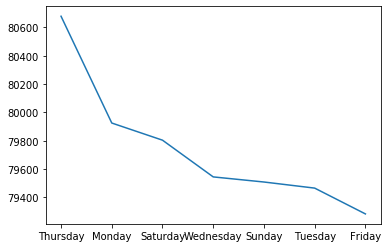

In [1581]:
combined_beneficiaries_providers['ClaimStart_Day'].value_counts().plot()

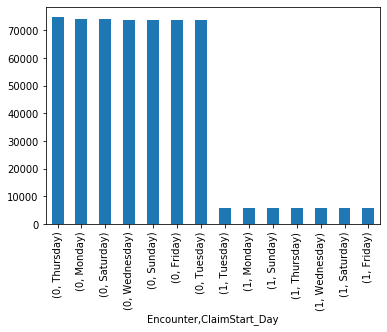

In [1582]:
combined_beneficiaries_providers.groupby(['Encounter']).ClaimStart_Day.value_counts().plot(x = 'ClaimStart_Day', kind = 'bar')

In [1599]:
len(combined_beneficiaries_providers['ClmAdmitDiagnosisCode'].unique())
# 4099 ClmAdmitDiagnosisCode
top_claimDiagnosis = combined_beneficiaries_providers['ClmAdmitDiagnosisCode'].value_counts().sort_values(ascending=False)[0:6]
top_claimDiagnosis.head()

None     412312
V7612      4074
42731      3634
78605      2992
4019       2732
Name: ClmAdmitDiagnosisCode, dtype: int64

In [1602]:
combined_beneficiaries_providers.groupby(['ClmAdmitDiagnosisCode']).agg({'ClmAdmitDiagnosisCode':'count','ClaimStart_Day': 'count'}).sort_values(by='ClmAdmitDiagnosis Code', ascending=False)


SyntaxError: invalid syntax (<ipython-input-1602-c979fc19b31d>, line 1)

#### Create new features to indicate the percentage a diagnosis or procedure code shows up fraudulent

In [56]:
train_fraud = train.loc[train.PotentialFraud == 1]
train_fraud.head()

,PotentialFraud
Provider,
PRV51003,1
PRV51005,1
PRV51021,1
PRV51037,1
PRV51052,1


In [58]:
# Select only observations that had a provider potential fraudulent flag
combined_fraud = pd.merge(combined_beneficiaries_providers, train_fraud, on = ['Provider', 'PotentialFraud'], how = 'inner')
combined_fraud.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,LengthStay,Encounter,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,None,None,None,None,None,None,None,6 days 00:00:00,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,None,NaT,None,0.0,NaT,None,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,None,None,None,None,None,None,None,0,0,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,78.0,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,None,7769,5849,None,None,None,None,12 days 00:00:00,1,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,96.0,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,None,9338,None,None,None,None,None,18 days 00:00:00,1,1922-10-01,NaT,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,87.0,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,None,None,None,8154,None,None,None,None,None,4 days 00:00:00,1,1930-07-01,NaT,2,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,79.0,1


In [59]:
# Create new data frame to calculate percentage when a code was involved with a potentially
# fraudulent provider
combined_Diagnosis = pd.DataFrame()
combined_Diagnosis['Diagnosis'] = pd.concat([combined_beneficiaries_providers["ClmDiagnosisCode_1"], combined_beneficiaries_providers["ClmDiagnosisCode_2"], combined_beneficiaries_providers["ClmDiagnosisCode_3"], combined_beneficiaries_providers["ClmDiagnosisCode_4"],  combined_beneficiaries_providers["ClmDiagnosisCode_5"], combined_beneficiaries_providers["ClmDiagnosisCode_6"], combined_beneficiaries_providers["ClmDiagnosisCode_7"], combined_beneficiaries_providers["ClmDiagnosisCode_8"], combined_beneficiaries_providers["ClmDiagnosisCode_9"], combined_beneficiaries_providers['ClmDiagnosisCode_10']], axis=0).dropna()
combined_FraudDiagnosis = pd.DataFrame()
combined_FraudDiagnosis['Diagnosis'] = pd.concat([combined_fraud["ClmDiagnosisCode_1"], combined_fraud["ClmDiagnosisCode_2"], combined_fraud["ClmDiagnosisCode_3"], combined_fraud["ClmDiagnosisCode_4"],  combined_fraud["ClmDiagnosisCode_5"], combined_fraud["ClmDiagnosisCode_6"], combined_fraud["ClmDiagnosisCode_7"], combined_fraud["ClmDiagnosisCode_8"], combined_fraud["ClmDiagnosisCode_9"], combined_fraud["ClmDiagnosisCode_10"]], axis=0).dropna()

combined_DiagnosisCounts = pd.DataFrame()
combined_DiagnosisCounts['Diagnosis_Counts'] = combined_Diagnosis['Diagnosis'].value_counts()
combined_DiagnosisCounts['FraudDiagnosis_Counts'] = combined_FraudDiagnosis['Diagnosis'].value_counts()
combined_DiagnosisCounts['Fraud_Percentage'] = combined_DiagnosisCounts['FraudDiagnosis_Counts']/combined_DiagnosisCounts['Diagnosis_Counts']*100
combined_DiagnosisCounts['Diagnosis_Codes'] = combined_DiagnosisCounts.index
combined_DiagnosisCounts.fillna(0, inplace=True)

In [60]:
combined_DiagnosisCounts

,Diagnosis_Counts,FraudDiagnosis_Counts,Fraud_Percentage,Diagnosis_Codes
None,3901394,1443762.0,37.006311,None
4019,77056,31029.0,40.268117,4019
25000,37356,15087.0,40.387086,25000
2724,35763,14690.0,41.075972,2724
V5869,24904,9116.0,36.604562,V5869
...,...,...,...,...
80454,1,1.0,100.000000,80454
80079,1,0.0,0.000000,80079
64854,1,0.0,0.000000,64854
80446,1,1.0,100.000000,80446


In [61]:
def get_percentage(code, df, percentage_col):
    return df.at[code, percentage_col]

In [62]:
# combined_beneficiaries_providers['test_code1'] = combined_beneficiaries_providers['ClmDiagnosisCode_1'].map(lambda x: get_percentage(x, combined_DiagnosisCounts, 'Fraud_Percentage'))
# combined_beneficiaries_providers.head()

In [63]:
combined_DiagnosisCounts.loc['1970']

Diagnosis_Counts             725
FraudDiagnosis_Counts        331
Fraud_Percentage         45.6552
Diagnosis_Codes             1970
Name: 1970, dtype: object

In [64]:
ClmDiagnosisCode_Percentage = ['ClmDiagnosisCode1_Percentage', 'ClmDiagnosisCode2_Percentage', 
                               'ClmDiagnosisCode3_Percentage', 'ClmDiagnosisCode4_Percentage', 
                               'ClmDiagnosisCode5_Percentage', 'ClmDiagnosisCode6_Percentage', 
                               'ClmDiagnosisCode7_Percentage', 'ClmDiagnosisCode8_Percentage', 
                               'ClmDiagnosisCode9_Percentage', 'ClmDiagnosisCode10_Percentage']
       
i = 0
for new_col in ClmDiagnosisCode_Percentage :
    claim = ClmDiagnosisCodes[i]
    combined_beneficiaries_providers[new_col] = combined_beneficiaries_providers[claim].map(lambda x: get_percentage(x, combined_DiagnosisCounts, 'Fraud_Percentage'))
    i += 1
    

In [65]:
combined_beneficiaries_providers.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,LengthStay,Encounter,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud,ClmDiagnosisCode1_Percentage,ClmDiagnosisCode2_Percentage,ClmDiagnosisCode3_Percentage,ClmDiagnosisCode4_Percentage,ClmDiagnosisCode5_Percentage,ClmDiagnosisCode6_Percentage,ClmDiagnosisCode7_Percentage,ClmDiagnosisCode8_Percentage,ClmDiagnosisCode9_Percentage,ClmDiagnosisCode10_Percentage
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,None,None,None,None,None,None,None,6 days 00:00:00,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0,1,45.655172,40.268117,41.571320,49.579832,48.607087,42.947611,41.075972,44.923077,53.796680,37.006311
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,None,NaT,None,0.0,NaT,None,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,None,None,None,None,None,None,None,0,0,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,78.0,1,39.473684,43.140152,43.342037,45.882505,49.269311,37.675607,52.000000,41.056604,38.461538,37.006311
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,None,7769,5849,None,None,None,None,12 days 00:00:00,1,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,96.0,1,44.341148,55.784866,44.737360,49.282206,38.888889,40.196078,42.335244,45.945946,76.470588,37.006311
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,None,9338,None,None,None,None,None,18 days 00:00:00,1,1922-10-01,NaT,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,87.0,1,49.975087,47.959184,47.117296,39.189804,45.471349,41.399177,35.951662,48.387097,40.268117,37.006311
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,None,None,None,8154,None,None,None,None,None,4 days 00:00:00,1,1930-07-01,NaT,2,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,79.0,1,47.493036,41.379310,40.268117,51.851852,44.341148,41.340909,48.607087,37.006311,37.006311,37.006311


In [66]:
combined_DiagnosisCounts.loc['28489']

Diagnosis_Counts             510
FraudDiagnosis_Counts        205
Fraud_Percentage         40.1961
Diagnosis_Codes            28489
Name: 28489, dtype: object

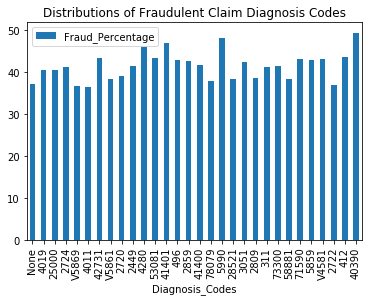

In [67]:
combined_DiagnosisCounts.head(30).plot(x='Diagnosis_Codes', y='Fraud_Percentage', kind='bar', title="Distributions of Fraudulent Claim Diagnosis Codes")


In [77]:
FraudCode_testDF = combined_DiagnosisCounts.loc[combined_DiagnosisCounts['Fraud_Percentage'] > 50]
FraudCode_testDF.loc[FraudCode_testDF['FraudDiagnosis_Counts'] > 5]


,Diagnosis_Counts,FraudDiagnosis_Counts,Fraud_Percentage,Diagnosis_Codes
5849,4820,2593.0,53.796680,5849
486,4778,2478.0,51.862704,486
2761,4058,2113.0,52.069985,2761
49121,3056,1580.0,51.701571,49121
2851,2165,1247.0,57.598152,2851
...,...,...,...,...
E9460,8,7.0,87.500000,E9460
0062,7,6.0,85.714286,0062
9658,7,6.0,85.714286,9658
64891,7,7.0,100.000000,64891


In [68]:
combined_Procedure = pd.DataFrame()
combined_Procedure['Procedures'] = pd.concat([combined_beneficiaries_providers["ClmProcedureCode_1"], combined_beneficiaries_providers["ClmProcedureCode_2"], combined_beneficiaries_providers["ClmProcedureCode_3"], combined_beneficiaries_providers["ClmProcedureCode_4"],  combined_beneficiaries_providers["ClmProcedureCode_5"], combined_beneficiaries_providers["ClmProcedureCode_6"]], axis=0).dropna()
combined_FraudProcedure = pd.DataFrame()
combined_FraudProcedure['Procedures'] = pd.concat([combined_fraud["ClmProcedureCode_1"], combined_fraud["ClmProcedureCode_2"], combined_fraud["ClmProcedureCode_3"], combined_fraud["ClmProcedureCode_4"],  combined_fraud["ClmProcedureCode_5"], combined_fraud["ClmProcedureCode_6"]], axis=0).dropna()

combined_ProcedureCounts = pd.DataFrame()
combined_ProcedureCounts['Procedure_Counts'] = combined_Procedure['Procedures'].value_counts()
combined_ProcedureCounts['FraudProcedure_Counts'] = combined_FraudProcedure['Procedures'].value_counts()
combined_ProcedureCounts['Fraud_Percentage'] = combined_ProcedureCounts['FraudProcedure_Counts']/combined_ProcedureCounts['Procedure_Counts']*100
combined_ProcedureCounts['Procedure_Codes'] = combined_ProcedureCounts.index
combined_ProcedureCounts.fillna(0, inplace=True)


In [69]:
combined_ProcedureCounts.head()

,Procedure_Counts,FraudProcedure_Counts,Fraud_Percentage,Procedure_Codes
None,3319370,1259361.0,37.939760,None
4019.0,1959,1139.0,58.141909,4019
9904.0,1152,634.0,55.034722,9904
2724.0,1054,641.0,60.815939,2724
8154.0,1022,615.0,60.176125,8154


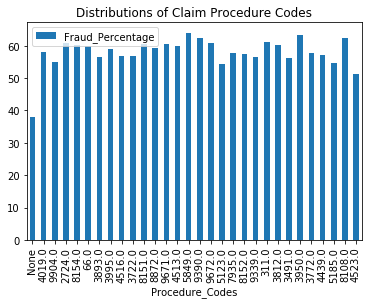

In [71]:
combined_ProcedureCounts.head(30).plot(x='Procedure_Codes', y='Fraud_Percentage', kind='bar', title='Distributions of Claim Procedure Codes')


#### New feature to count total number of diagnosis claims and procedure claims for each observation

In [749]:
temp_combined = combined_beneficiaries_providers.copy()
temp_combined.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,LengthStay,Encounter,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 days,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,67.0,0.0,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,None,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,78.0,0.0,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,12 days,1,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,96.0,0.0,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,18 days,1,1922-10-01,NaT,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,87.0,0.0,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,4 days,1,1930-07-01,NaT,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,79.0,0.0,1


In [750]:
claims = ['ClmDiagnosisCode_1', 
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6']
for claim in claims:
    temp_combined[claim] = temp_combined[claim].apply(lambda x: 1 if pd.notnull(x) else 0)
temp_combined.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,LengthStay,Encounter,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,6 days,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,67.0,0.0,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,None,NaT,NaN,0.0,NaT,NaN,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,NaT,0,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,78.0,0.0,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,12 days,1,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,96.0,0.0,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,18 days,1,1922-10-01,NaT,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,87.0,0.0,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,4 days,1,1930-07-01,NaT,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,79.0,0.0,1


In [760]:
# temp_combined['TotalClmDiagnosis'] = pd.Series()

temp_combined['TotalClmDiagnosis'] = temp_combined['ClmDiagnosisCode_1'] + temp_combined['ClmDiagnosisCode_2'] + temp_combined['ClmDiagnosisCode_3'] + temp_combined['ClmDiagnosisCode_4'] + temp_combined['ClmDiagnosisCode_5'] + temp_combined['ClmDiagnosisCode_6'] + temp_combined['ClmDiagnosisCode_7'] + temp_combined['ClmDiagnosisCode_8'] + temp_combined['ClmDiagnosisCode_9']
temp_combined.head()



,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,LengthStay,Encounter,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased,PotentialFraud,TotalClmDiagnosis,TotalClmDiagnosis_test
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,6 days,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,67.0,0.0,1,9.0,3
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,None,NaT,NaN,0.0,NaT,NaN,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,NaT,0,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,78.0,0.0,1,9.0,3
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,12 days,1,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,96.0,0.0,1,9.0,3
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,18 days,1,1922-10-01,NaT,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,87.0,0.0,1,9.0,3
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,4 days,1,1930-07-01,NaT,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,79.0,0.0,1,7.0,3


In [748]:
# temp_combined['TotalClmProcedure'] = pd.Series()
temp_combined['TotalClmProcedure'] = temp_combined['ClmProcedureCode_1'] + temp_combined['ClmProcedureCode_2'] + temp_combined['ClmProcedureCode_3'] + temp_combined['ClmProcedureCode_4'] + temp_combined['ClmProcedureCode_5'] + temp_combined['ClmProcedureCode_6']
temp_combined.head()
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,LengthStay,Encounter,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased,PotentialFraud,TotalClmDiagnosis,TotalClmProcedure
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,6 days,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,67.0,0.0,1,9.0,0.0
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,None,NaT,NaN,0.0,NaT,NaN,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,NaT,0,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,78.0,0.0,1,9.0,0.0
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,12 days,1,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,96.0,0.0,1,9.0,2.0
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,18 days,1,1922-10-01,NaT,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,87.0,0.0,1,9.0,1.0
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,4 days,1,1930-07-01,NaT,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,79.0,0.0,1,7.0,1.0
